##### Implement EM algorithm yourself.  
Use the following initialization.  
1)  initialization for mean: random Gaussian vector with zero mean  
2) initialization for covariance: generate two Gaussian random matrix of size n-by-n: S1 and S2, and initialize the covariance matrix for the two components. Plot the log-likelihood function versus the number of iterations to show your algorithm is converging.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from sklearn.cluster import KMeans

import scipy.io as spio
import scipy.sparse.linalg as ll
from sklearn import preprocessing
from scipy.stats import multivariate_normal as mvn
from collections import defaultdict

## Loading the isomap.dat data file
data = spio.loadmat('data/data.mat')['data']

## The matrix images is of size 784-by-1990, i.e., there are totally 1990 images, and each
## column of the matrix corresponds to one image of size 28-by-28 pixels (the image is vectorized; 
## the original image can be recovered by map the vector into a matrix).

print(data.shape)

ndata = preprocessing.scale(data.T)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m

# pca the data
d = 4  # reduced dimension
V,_,_ = np.linalg.svd(C)
V = V[:, :d]

# Data projected as 4-dimensional vectors
pdata = np.dot(ndata,V)

(784, 1990)


#### Implementation of EM Algorithm and Visualization of convergence  

Source code will be provided upon request

In [19]:
# EM-GMM Initializations for the HW dataset
# number of mixtures
K = 2

# random seed
seed = 1

# initialize prior
np.random.seed(seed)
pi = np.random.random(K)
pi = pi/np.sum(pi)

# initial mean and covariance
np.random.seed(seed)
mu = np.random.randn(K,d)
mu_old = mu.copy()

# Initialize Covariance
sigma = []
for ii in range(K):
    # to ensure the covariance psd
    np.random.seed(seed)
    dummy = np.random.randn(d, d)
    sigma.append(dummy@dummy.T)
    
## Performing transofrmation on sigma and adding to identity matrix
S1 = np.array(sigma[0])
S2 = np.array(sigma[1])
sigma1 = S1.dot(S1.T) + np.identity(d)
sigma2 = S2.dot(S2.T) + np.identity(d)

sigma = [sigma1,sigma2]

# initialize the posterior
tau = np.full((m, K), fill_value=0.)
maxIter= 100
tol = 1e-3

-----iteration--- 0


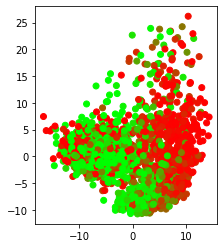

-----iteration--- 1


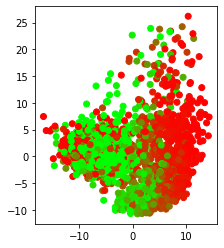

-----iteration--- 2


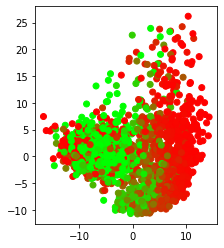

-----iteration--- 3


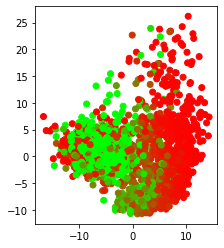

-----iteration--- 4


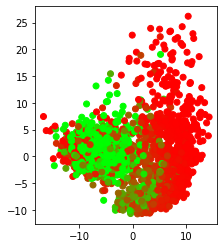

-----iteration--- 5


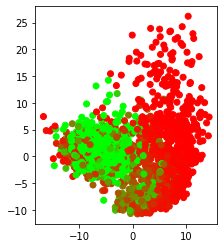

-----iteration--- 6


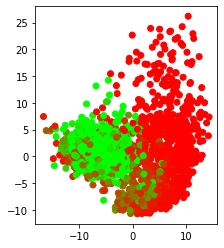

-----iteration--- 7


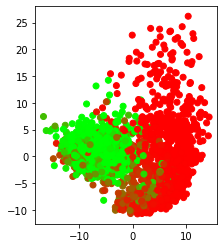

-----iteration--- 8


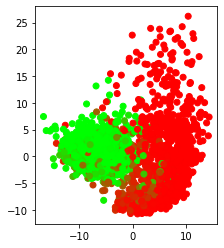

-----iteration--- 9


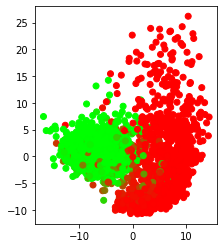

-----iteration--- 10


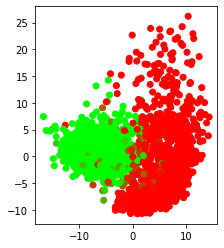

-----iteration--- 11


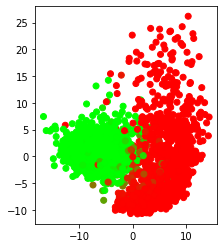

-----iteration--- 12


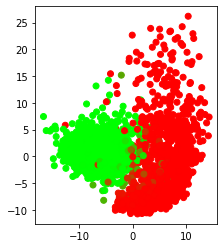

-----iteration--- 13


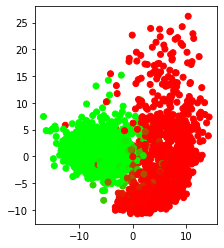

-----iteration--- 14


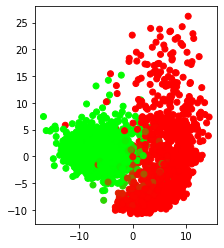

-----iteration--- 15


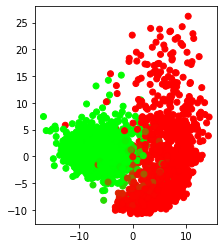

-----iteration--- 16


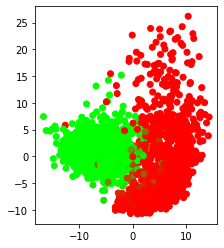

-----iteration--- 17


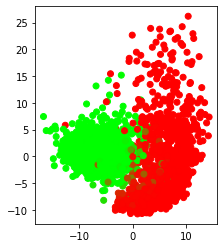

-----iteration--- 18


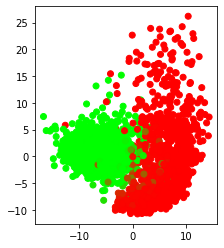

-----iteration--- 19


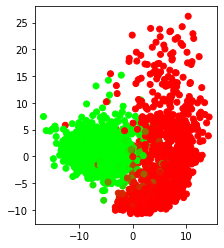

-----iteration--- 20


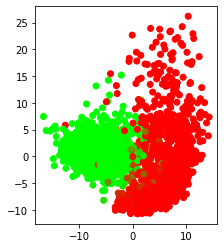

training coverged


In [20]:
## Implementation of EM Algorithm
plot = defaultdict(list)

for ii in range(100):
    
    # E-step
    for kk in range(K):
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
        # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (m,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
    
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:, kk])/m
        
        # update component mean
        mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        # update cov matrix
        dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
        res = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
        plot[ii].append(res)
        
    print('-----iteration---',ii)    
    #plt.scatter(pdata[:,0], pdata[:,1], c= tau)
    plt.scatter(pdata[:,0], pdata[:,1], c= np.hstack((tau, np.zeros((len(tau),1)))))
    plt.axis('scaled')
    plt.draw()
    plt.pause(0.1)
    if np.linalg.norm(mu-mu_old) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==99:
        print('max iteration reached')
        break

#### Plotting the Log-likelihood Versus number of iterations taken to converge

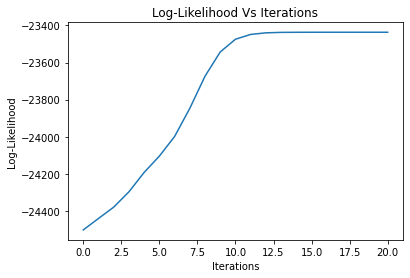

In [21]:
## Log-likelihood plot

plot2 = {k:np.sum(np.log(sum(v))) for k,v in dict(plot).items()}
x,y = zip(*plot2.items())

plt.plot(x,y)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Vs Iterations')
plt.show()

##### Reporting the fitted GMM model when EM has terminated in your algorithms as follows. Reporting the weights for each component, and the mean of each component, by mapping them back to the original space and reformat the vector to make them into 28-by-28 matrices and show images. Ideally, you should be able to see these means corresponds to some kind of \average" images

In [22]:
print("Probability of each component")
pi

Probability of each component


array([0.50433622, 0.49566378])

In [23]:
print("Mean of both components")
mu

Mean of both components


array([[ 5.37478843, -0.67255252, -0.92609585, -0.77875935],
       [-5.46882915,  0.68431993,  0.94229941,  0.79238502]])

In [24]:
print("Covariance of both components")
sigma

Covariance of both components


[array([[13.21588211,  8.02916293,  3.20382783,  9.92330698],
        [ 8.02916293, 55.52623901, -4.42244973, -4.3117529 ],
        [ 3.20382783, -4.42244973,  8.72764396,  3.75178839],
        [ 9.92330698, -4.3117529 ,  3.75178839, 17.33977651]]),
 array([[11.85943711, -0.74914265,  6.95805041, -1.50461134],
        [-0.74914265,  8.03271041,  3.22124761,  3.31202867],
        [ 6.95805041,  3.22124761, 51.47794997, -5.29792048],
        [-1.50461134,  3.31202867, -5.29792048, 20.40464965]])]

#### Visualizing the weights and mean of 2 and 6 digits as images

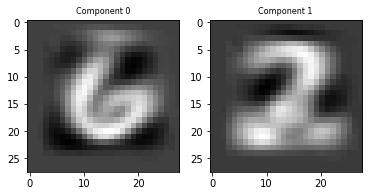

In [25]:
## Reporting the weights and mean of 2 and 6 digits as images
fig = plt.figure(figsize=(6, 4))
columns = 2
rows = 1

for i in range(K): 
    sp = fig.add_subplot(rows, columns, i+1)
    sp.set_title(f"Component {i}", fontdict = {'fontsize':8})
    plt.imshow((V.dot(mu[i])+ np.mean(data, axis = 1)).reshape(28,28,order="F"),cmap='gray')

#### Displaying the covariance matrix as heatmap


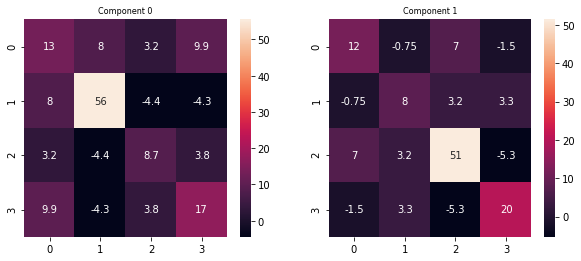

In [26]:
# Displaying the covariance matrix as heatmap
fig = plt.figure(figsize=(10, 4))
columns = 2
rows = 1

for i in range(K):
    sp = fig.add_subplot(rows, columns, i+1)
    sp.set_title(f"Component {i}", fontdict = {'fontsize':8})
    sns.heatmap(sigma[i], annot=True)
plt.show()

##### Using the tau to infer the labels of the images, and compare with the true labels. Reporting the mis-classification rate for digits "2" and "6" respectively. Perform K-means clustering with K = 2 (you may call a package or use the code from your previous homework). Find out the mis-classification rate for digits \2" and \6" respectively, and compare with GMM. Which one achieves the better performance?

In [28]:
## Loading the labels data

true_labels = spio.loadmat('data/label.mat')['trueLabel'].flatten()

In [31]:
## Identifying the classification of 2's or 6's in tau
res = []
pred_label = []

for i in range(tau.shape[0]):
    res.append(tau[i] == max(tau[i]))    
gmm_labels = np.array(res)

for row in gmm_labels:
    if row[0] == True:
        pred_label.append(6)
    else:
        pred_label.append(2)

In [32]:
import pandas as pd
true = pd.Series(true_labels, name='Actual')
pred_gmm = pd.Series(pred_label, name='Predicted')
df_confusion = pd.crosstab(true, pred_gmm)
df_confusion

Predicted,2,6
Actual,,
2,970,62
6,12,946


In [33]:
## Misclassification of 2's as 6's
62/(970+62)*100

6.007751937984496

In [34]:
## Misclassification of 6's as 2's
12/(946+12)*100

1.2526096033402923

#### We can see that 6% of 2’s are mis-classified as 6’s and 1.2% of 6’s are misclassified as 2’s

#### Implementing KMeans for classification and comparing with GM

In [35]:
## Clustering using KMeans
km = KMeans(n_clusters=2, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
kmeans = km.fit_predict(pdata)

kmeans[kmeans == 0] = 2
kmeans[kmeans == 1] = 6

In [36]:
pred_kmeans = pd.Series(kmeans, name='Predicted')
df_confusion_kmeans = pd.crosstab(true, pred_kmeans)
df_confusion_kmeans

Predicted,2,6
Actual,,
2,953,79
6,31,927


In [37]:
## Misclassification of 2's as 6's
79/(953+79)*100

7.655038759689922

In [38]:
## Misclassification of 6's as 2's
31/(927+31)*100

3.2359081419624216

#### We can see that 7.6% of 2’s are mis-classified as 6’s and 3.2% of 6’s are misclassified as 2’s

#### Observation

We can observe and state that GMM performs better than KMeans in classifying the clusters well.

### END